### <b> Bayesian Task-Adaptive Meta Learning algorithm (Bayesian TAML) </b>

In [14]:
"""setup information"""
import torch
import matplotlib.pyplot as plt
import Data
import importlib as imp
import numpy as np
"""dataset split as specified by the authors"""
train_class_names = [
    'train', 'skyscraper', 'turtle', 'raccoon', 'spider', 'orange', 'castle', 'keyboard',
    'clock', 'pear', 'girl', 'seal', 'elephant', 'apple', 'aquarium_fish', 'bus',
    'mushroom', 'possum', 'squirrel', 'chair', 'tank', 'plate', 'wolf', 'road', 'mouse',
    'boy', 'shrew', 'couch', 'sunflower', 'tiger', 'caterpillar', 'lion', 'streetcar',
    'lawn_mower', 'tulip', 'forest', 'dolphin', 'cockroach', 'bear', 'porcupine', 'bee',
    'hamster', 'lobster', 'bowl', 'can', 'bottle', 'trout', 'snake', 'bridge',
    'pine_tree', 'skunk', 'lizard', 'cup', 'kangaroo', 'oak_tree', 'dinosaur', 'rabbit',
    'orchid', 'willow_tree', 'ray', 'palm_tree', 'mountain', 'house', 'cloud'
    ]
valid_class_names = [
    'otter', 'motorcycle', 'television', 'lamp', 'crocodile', 'shark', 'butterfly', 'sea',
    'beaver', 'beetle', 'tractor', 'flatfish', 'maple_tree', 'camel', 'crab', 'cattle'
    ]
test_class_names = [
    'baby', 'bed', 'bicycle', 'chimpanzee', 'fox', 'leopard', 'man', 'pickup_truck',
    'plain', 'poppy', 'rocket', 'rose', 'snail', 'sweet_pepper', 'table', 'telephone',
    'wardrobe', 'whale', 'woman', 'worm'
    ]
import encoder_mod
imp.reload(encoder_mod)
nn1 = encoder_mod.InferenceNetwork(number_of_ways=5, max_shots=9, input_channels=3, hidden_channels=10,
                                   use_omega=True, use_gamma=True, use_zeta=True)
nn1.to('cuda')
import Data
dl = Data.get_dataloader(train_class_names, 50, 15, 5, 9, 4, False)
# x = torch.ones(size=(7, 3, 32, 32))
# y = torch.zeros(size=(7, 1))
for i, task_batch in enumerate(dl):
    for task in task_batch:
        x, y, _, _ = task
        print(f"x shape: {x.shape}")
        print(f"y shape: {y.shape}")
        # print(y)
        omega, gamma, zeta, KL = nn1(x, y[:, None], we_are_training=True)
        print(f"Omega: {omega}, shape {omega.shape}")
        print(f"Gamma, a dictionary:")
        for parameter_name in gamma.keys():
            print(f"\t{parameter_name}, \tshape: {gamma[parameter_name].shape}")
        print(f"Zeta, a dictionary:")
        for parameter_name in zeta.keys():
            print(f"\t{parameter_name}, \tshape: {zeta[parameter_name].shape}")
        print(f"KL: {KL}")
        break
    break

x shape: torch.Size([250, 3, 32, 32])
y shape: torch.Size([250])
Omega: tensor([-0.6345, -1.8643, -0.0497, -0.0131,  1.1204], device='cuda:0'), shape torch.Size([5])
Gamma, a dictionary:
	convolution_weight0, 	shape: torch.Size([1])
	convolution_bias0, 	shape: torch.Size([1])
	convolution_weight1, 	shape: torch.Size([1])
	convolution_bias1, 	shape: torch.Size([1])
	convolution_weight2, 	shape: torch.Size([1])
	convolution_bias2, 	shape: torch.Size([1])
	convolution_weight3, 	shape: torch.Size([1])
	convolution_bias3, 	shape: torch.Size([1])
	linear_weight, 	shape: torch.Size([1])
	linear_bias, 	shape: torch.Size([1])
Zeta, a dictionary:
	convolution_weight0, 	shape: torch.Size([32])
	convolution_bias0, 	shape: torch.Size([32])
	convolution_weight1, 	shape: torch.Size([32])
	convolution_bias1, 	shape: torch.Size([32])
	convolution_weight2, 	shape: torch.Size([32])
	convolution_bias2, 	shape: torch.Size([32])
	convolution_weight3, 	shape: torch.Size([32])
	convolution_bias3, 	shape: torc

In [1]:
"""setup information"""
import torch
import matplotlib.pyplot as plt
import TAML_code
import Data
import importlib as imp
import numpy as np
import encoder
"""dataset split as specified by the authors"""
train_class_names = [
    'train', 'skyscraper', 'turtle', 'raccoon', 'spider', 'orange', 'castle', 'keyboard',
    'clock', 'pear', 'girl', 'seal', 'elephant', 'apple', 'aquarium_fish', 'bus',
    'mushroom', 'possum', 'squirrel', 'chair', 'tank', 'plate', 'wolf', 'road', 'mouse',
    'boy', 'shrew', 'couch', 'sunflower', 'tiger', 'caterpillar', 'lion', 'streetcar',
    'lawn_mower', 'tulip', 'forest', 'dolphin', 'cockroach', 'bear', 'porcupine', 'bee',
    'hamster', 'lobster', 'bowl', 'can', 'bottle', 'trout', 'snake', 'bridge',
    'pine_tree', 'skunk', 'lizard', 'cup', 'kangaroo', 'oak_tree', 'dinosaur', 'rabbit',
    'orchid', 'willow_tree', 'ray', 'palm_tree', 'mountain', 'house', 'cloud'
    ]
valid_class_names = [
    'otter', 'motorcycle', 'television', 'lamp', 'crocodile', 'shark', 'butterfly', 'sea',
    'beaver', 'beetle', 'tractor', 'flatfish', 'maple_tree', 'camel', 'crab', 'cattle'
    ]
test_class_names = [
    'baby', 'bed', 'bicycle', 'chimpanzee', 'fox', 'leopard', 'man', 'pickup_truck',
    'plain', 'poppy', 'rocket', 'rose', 'snail', 'sweet_pepper', 'table', 'telephone',
    'wardrobe', 'whale', 'woman', 'worm'
    ]

In [ ]:
imp.reload(TAML_code)
imp.reload(encoder)
imp.reload(Data)
number_of_inner_gradient_steps: int = 5
ways: int = 5
max_shots: int = 50
query: int = 15
iterations = 5 # epochs， 1000
inner_learning_rate: float = 0.5
outer_learning_rate: float = 1e-3
batch_size = 4 # how many tasks in this batch
total_train_task = batch_size * iterations
total_valid_task = batch_size * int(iterations * 0.1)
total_test_task = 60 # 600
imbalance = True
image = None
label = None
dataloader_train=Data.get_dataloader(train_class_names, max_shots, query, ways, total_train_task, batch_size, imbalance)
for i, task_batch in enumerate(dataloader_train):
    print(f"i: {i}")
    for t, task in enumerate(task_batch):
        print(f"\tt: {t}")
        img_supp, lbl_supp, img_quer, lbl_quer = task
        image = img_supp[0]
        label = lbl_supp[0]
        break
    break
f, ax = plt.subplots(figsize=(8, 8))
ax.imshow(image.cpu().numpy().reshape([32, 32, 3]).astype(int))
ax.set_title("label")

It's Training time! (start from iteration 0)
	It's Validating time! iteration 0
best train loss:     1.2192461490631104
best train accuracy: 0.5200000107288361
best valid loss:     1.4696868658065796
best valid accuracy: 0.40666668117046356


Text(0.5, 1.0, 'valid accuracy')

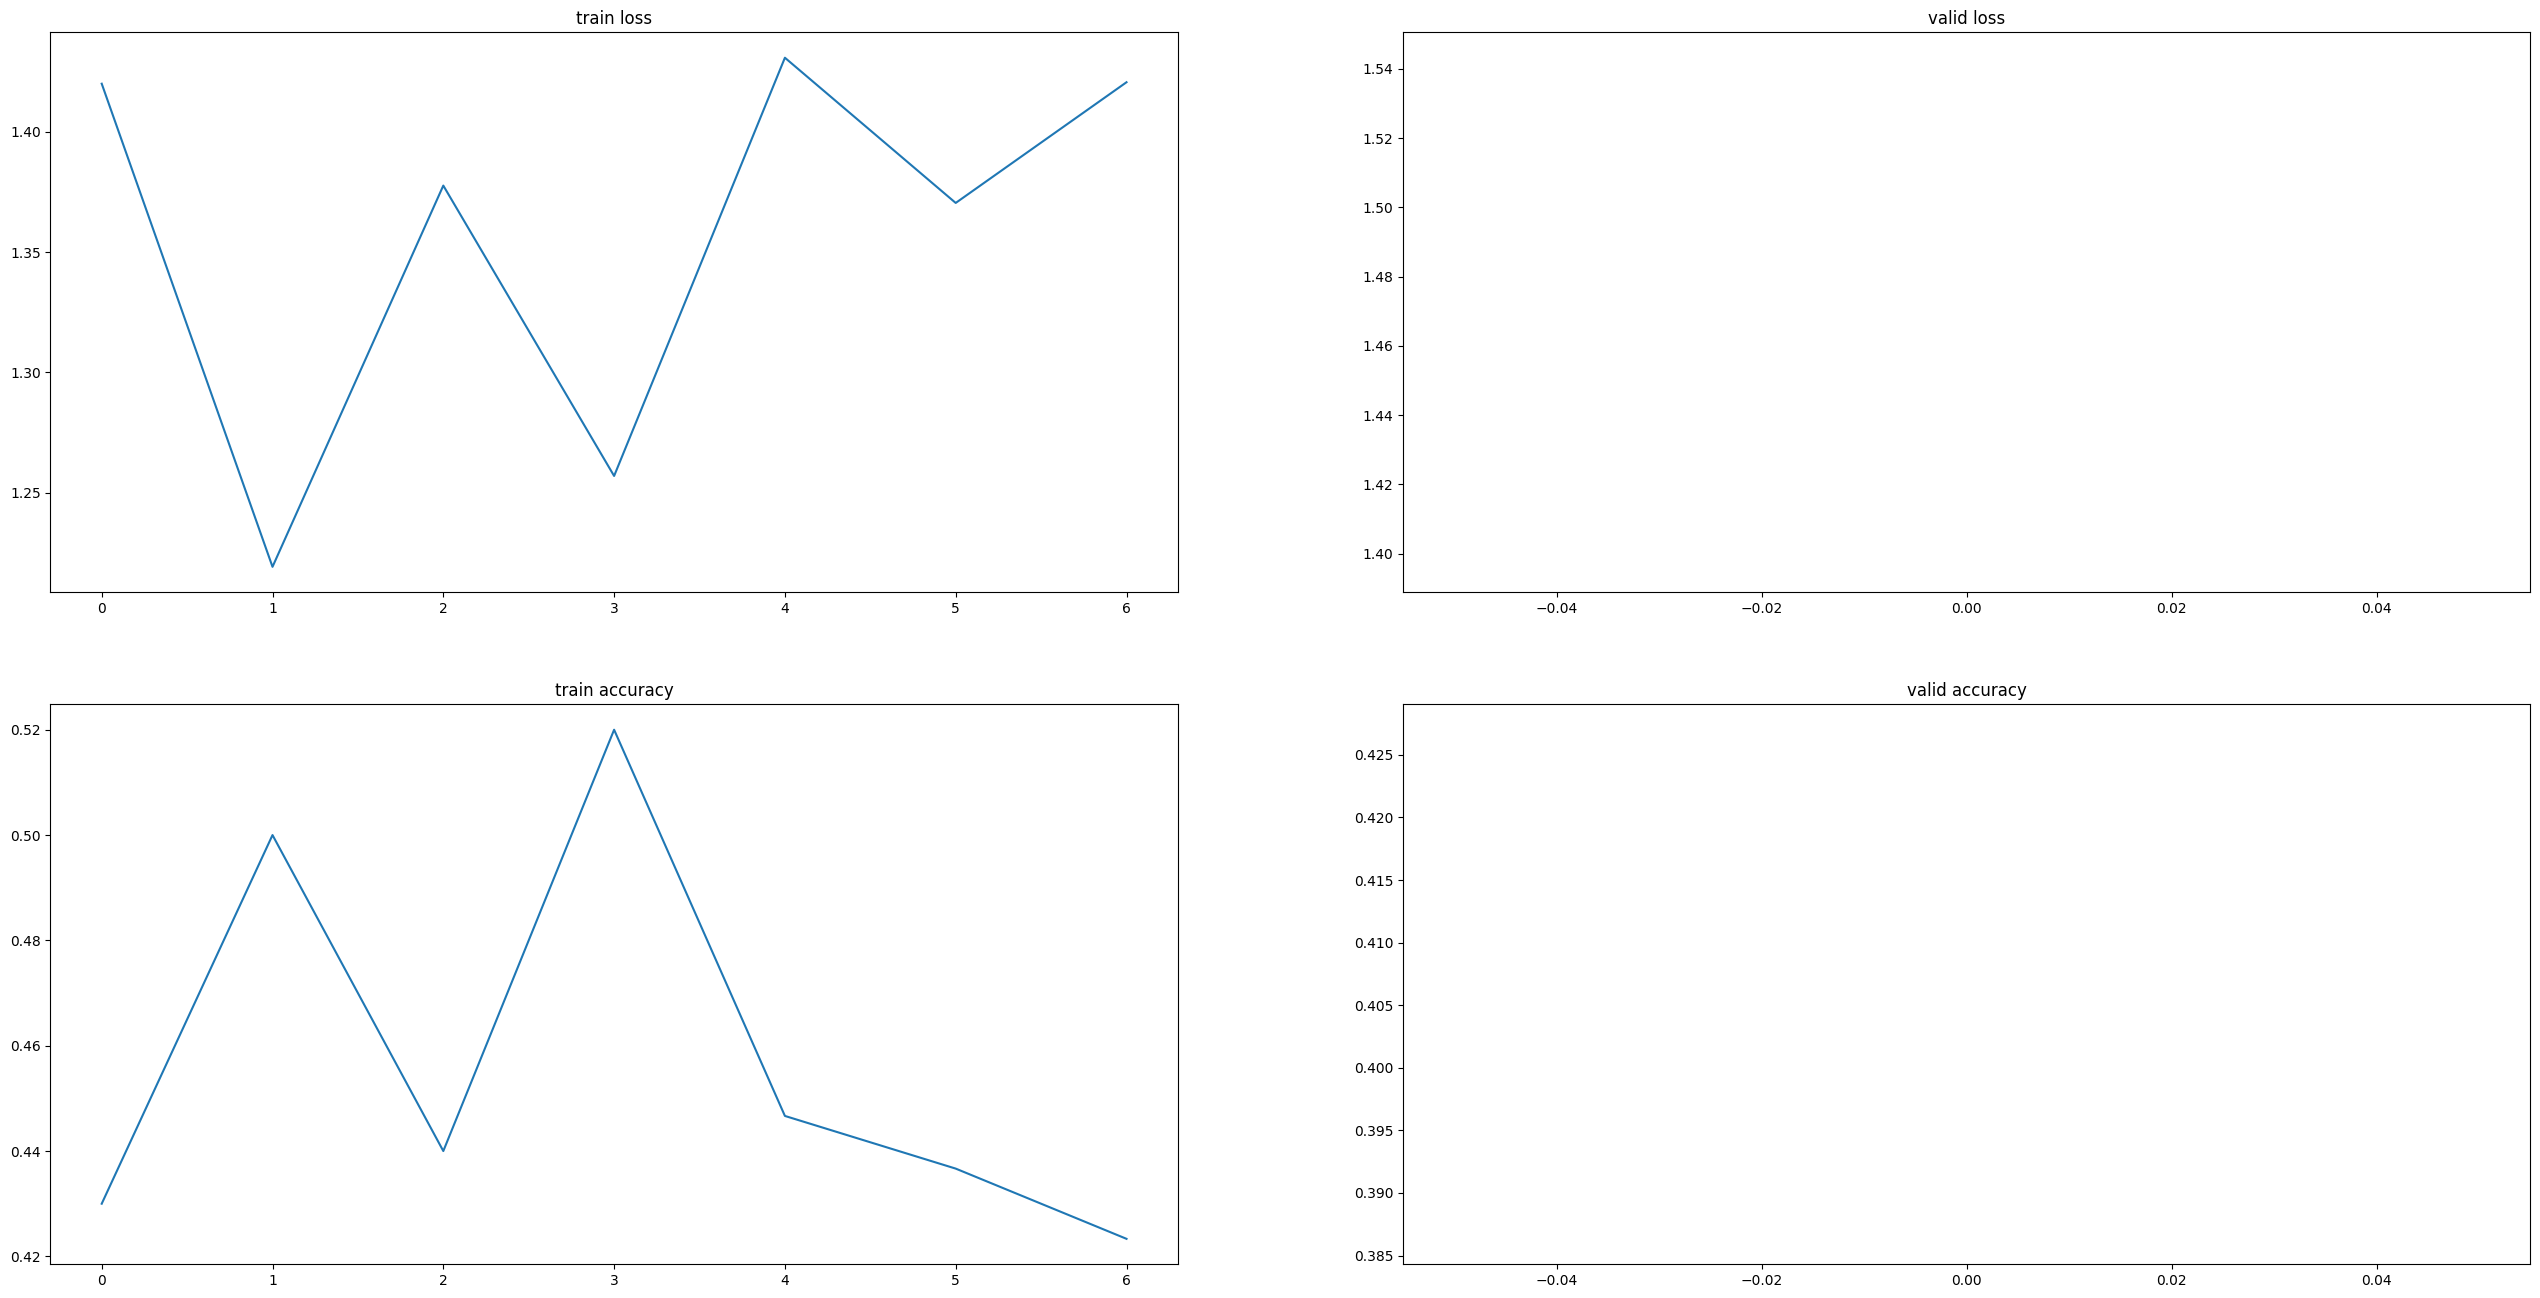

In [8]:
# to run: jupyter nbconvert --execute --to notebook TAML_notebook.ipynb
imp.reload(TAML_code)
imp.reload(encoder)
imp.reload(Data)
number_of_inner_gradient_steps: int = 5
ways: int = 5 # 5
max_shots: int = 50 # 50
query: int = 15 # 15
iterations = 7 # epochs， 1000
inner_learning_rate: float = 0.5
outer_learning_rate: float = 1e-3
batch_size = 4 # how many tasks in this batch
total_train_task = batch_size * iterations
valid_interval = 7 # was 50
total_valid_task = batch_size * int(iterations / valid_interval)
total_test_task = 600 # 600
imbalance = False
m = TAML_code.TAML(output_dimension=ways, inner_loop_step_ct=number_of_inner_gradient_steps,
    inner_learning_rate=inner_learning_rate, learn_inner_learning_rate=False, 
    outer_learning_rate=outer_learning_rate, batch_size=batch_size,
    encoder=encoder.InferenceNetwork(ways, max_shots, 'cifar', False, False, False))
# m._view_model(m._meta_parameters)
train_loss, train_accuracy, valid_loss, valid_accuracy = m.train(
    dataloader_train=Data.get_dataloader(train_class_names, max_shots, query, ways, total_train_task, batch_size, imbalance),
    dataloader_valid=Data.get_dataloader(valid_class_names, max_shots, query, ways, total_valid_task, batch_size, imbalance),
    valid_interval=valid_interval)
# test_loss, test_accuracy = m.test( 
#     dataloader_test =Data.get_dataloader(test_class_names,  max_shots, query, ways, total_valid_task, batch_size, imbalance))
# plot results:
f, ax = plt.subplots(figsize=(32, 16), nrows=2, ncols=2)
# plot train
ax[0, 0].plot(train_loss)
ax[0, 0].set_title("train loss")
ax[1, 0].plot(train_accuracy)
ax[1, 0].set_title("train accuracy")
# plot valid
ax[0, 1].plot(valid_loss)
ax[0, 1].set_title("valid loss")
ax[1, 1].plot(valid_accuracy)
ax[1, 1].set_title("valid accuracy")